In [ ]:
install.packages("tidyverse")
install.packages("car")
install.packages("tidyr")
install.packages("GGally")
install.packages("leaps")
install.packages("olsrr")
install.packages("corrplot")
install.packages("aod")


#Since we are analyzing the factors that influence employment status, our response variable is Currently_Employed, which is of binary type data

#Since the response variable is of binary type data, and the predictor variables are a mix of continuous and categorical variables, we would use logistic/probit regression

#Response variable comes from a bernoulli distribution (which belongs to the exponential family of distributions), where the linear model uses a logit link function

#We would use a generalized linear model, where the family is binomial with a logit link

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘plyr’


Installing package into ‘/usr/local/lib/R/

In [ ]:
#install.packages("car")
library(tidyverse)
library(car)
library(tidyr)
library(GGally)
library(leaps)
library(olsrr)
library(ggplot2)
library(corrplot)
library(gridExtra)
library(aod)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# loading in the data
data.initial <- read.csv("Labor_market_employment.csv")

# identify any missing values in the dataset
missing <-is.na(data.initial)

# counting the number of missing values in each row
byrow_missing <- apply(missing, MARGIN = 1, sum)

# remove the rows that have missing data
data <- data.initial[byrow_missing == 0, ]

# converting categorical variables to factors to make analysis easier
data$Gender <- as.factor(data$Gender)
data$Industry_Type <- as.factor(data$Industry_Type)
data$Currently_Employed <- as.factor(data$Currently_Employed)
data$Union_Membership <- as.factor(data$Union_Membership)

head(data)

,Age,Education_Years,Gender,Work_Experience,Industry_Type,Union_Membership,Population_Density,Income_Level,Currently_Employed
,<int>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,44,11,Female,5,Education,1,1946.303,76322.75,1
2,49,10,Female,26,Manufacturing,0,2361.784,96319.57,1
3,59,8,Female,34,Healthcare,1,1792.139,43950.50,0
4,26,17,Male,19,Retail,0,836.618,20632.73,1
5,35,13,Male,36,Education,0,3582.149,49771.37,0
6,58,16,Female,19,Technology,0,3709.707,47521.00,1


In [ ]:
# Check for duplicate rows
sum(duplicated(data))

[1] 0

In [ ]:
# creating a summary dataframe with key statistics for numeric variables
df <- data.frame(
  # calculating the mean for each numeric variable
  Mean = c(mean(data$Age), mean(data$Education_Years),
           mean(data$Work_Experience), mean(data$Population_Density),
           mean(data$Income_Level)),

  # calculating the median for each numeric variable
  Median = c(median(data$Age), median(data$Education_Years),
             median(data$Work_Experience),
             median(data$Population_Density), median(data$Income_Level)),

  # calculating the standard deviation for each numeric variable
  SD = c(sd(data$Age), sd(data$Education_Years),
         sd(data$Work_Experience), sd(data$Population_Density),
         sd(data$Income_Level)),

  # calculating the range for each numeric variable
  Range = c((max(data$Age) - min(data$Age)),
            (max(data$Education_Years) - min(data$Education_Years)),
            (max(data$Work_Experience) - min(data$Work_Experience)),
            (max(data$Population_Density) - min(data$Population_Density)),
            (max(data$Income_Level) - min(data$Income_Level)))
)

# assigning row names corresponding to the variable names
rownames(df) <- c("Age", "Education_Years", "Work_Experience", "Population_Density", "Income_Level")
df

,Mean,Median,SD,Range
,<dbl>,<dbl>,<dbl>,<dbl>
Age,40.13333,41.000,13.086114,46.000
Education_Years,12.49667,12.500,3.882469,13.000
Work_Experience,20.33667,21.000,12.070999,39.000
Population_Density,2586.36861,2604.572,1301.800178,4880.866
Income_Level,71031.06804,70847.322,27222.853406,99263.194


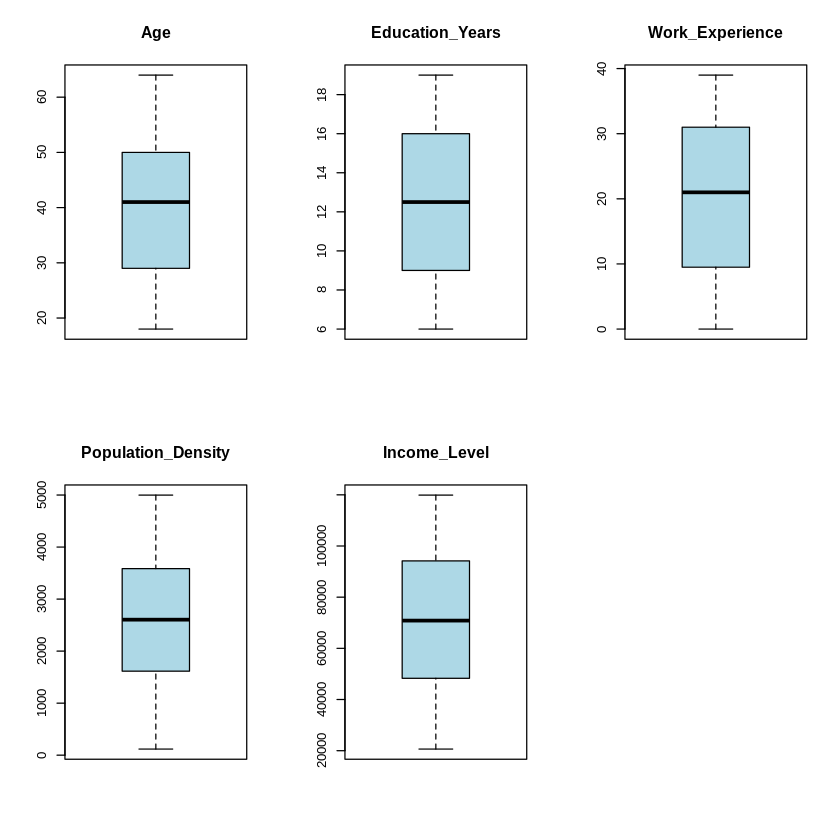

In [ ]:
# checking for outliers for continuous variables
# result: no outliers were found

cont_variables <- c("Age", "Education_Years", "Work_Experience", "Population_Density", "Income_Level")

par(mfrow = c(2, 3))

# creating boxplots
for (var in cont_variables) {
  boxplot(data[[var]], main = var, col = "lightblue", border = "black")
}

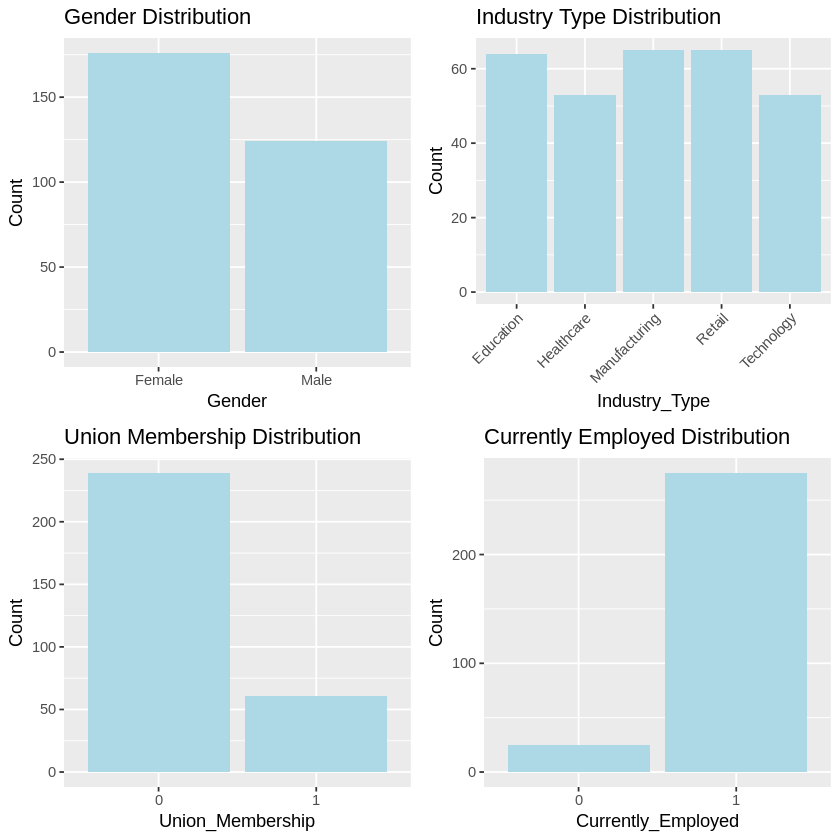

In [ ]:
#EDA
# plotting bar graphs to see if the there are any discrepencies in the distributions

# distribution of genders
# result: more females than males
plot1 <- ggplot(data, aes(x = Gender)) + # distribution of genders
            geom_bar(fill = "lightblue") +
            labs(title = "Gender Distribution", x = "Gender", y = "Count")

# distribution of industry type
# result: most are in manufacturing or retail; not as many in technology or healthcare
plot2 <- ggplot(data, aes(x = Industry_Type)) +
            geom_bar(fill = "lightblue") +
            labs(title = "Industry Type Distribution", x = "Industry_Type", y = "Count") +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))

# distribution of union membership
# result: most don't belong to union
plot3 <- ggplot(data, aes(x = Union_Membership)) +
            geom_bar(fill = "lightblue") +
            labs(title = "Union Membership Distribution", x = "Union_Membership", y = "Count")


# distribution of the employement status of individuals
# result: most are employed
plot4 <- ggplot(data, aes(x = Currently_Employed)) +
            geom_bar(fill = "lightblue") +
            labs(title = "Currently Employed Distribution", x = "Currently_Employed", y = "Count")

grid.arrange(plot1, plot2, plot3, plot4, ncol = 2, nrow = 2)

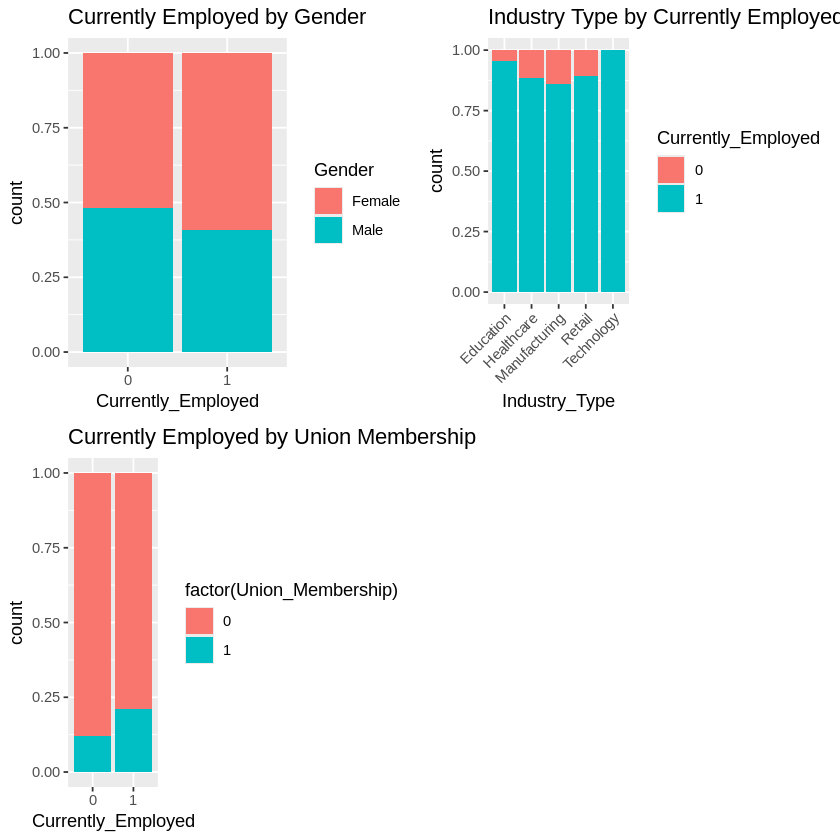

In [ ]:
#EDA
# plotting to see the relationship between categorical variables to current employment

# result: more employed females than males; more unemployed males than females
p1 <- ggplot(data, aes(x = Currently_Employed, fill = Gender)) +
        geom_bar(position = "fill") +
        labs(title = "Currently Employed by Gender")

# result: most that are currently employed work in technology; there are more currently unemployed
# individuals working in manufacturing than the rest of the industries
p2 <- ggplot(data, aes(x = Industry_Type, fill = Currently_Employed)) +
        geom_bar(position = "fill") +
        labs(title = "Industry Type by Currently Employed")  +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

# reuslt: most that are employed have a union membership; most that are unemployed don't have a union membership
p3 <- ggplot(data, aes(x = Currently_Employed, fill = factor(Union_Membership))) +
        geom_bar(position = "fill") +
        labs(title = "Currently Employed by Union Membership")

grid.arrange(p1, p2, p3, ncol = 2, nrow = 2)

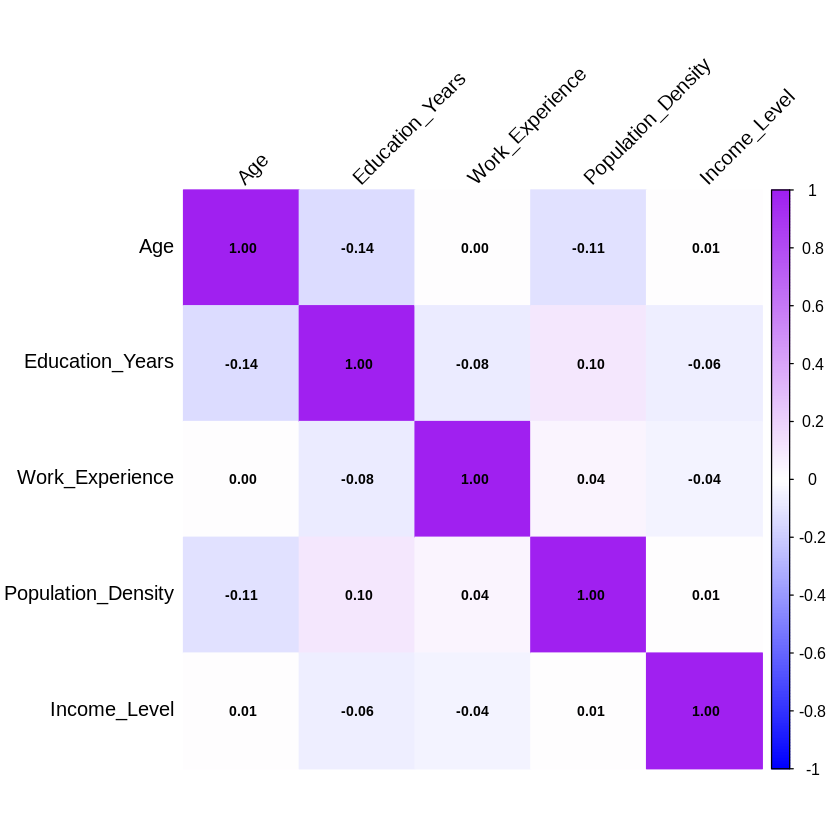

In [ ]:
# EDA
# created a heatmap to epxlicitly see the correlations between all numerical variables
# interesting findings: age and education years have a weak negative correlation (-0.14), work experience and age
# have no correlation (0.00), education and work experience have a weak correaltion (-0.08), and population
# density and income level have an almost zero correlation (0.01).
numeric_variables <- data %>%
  select_if(is.numeric)

cor_matrix <- cor(numeric_variables, use = "complete.obs")

corrplot(cor_matrix, method = "color", col = colorRampPalette(c("blue", "white", "purple"))(200),
         tl.col = "black", tl.srt = 45, addCoef.col = "black", number.cex = 0.7)

In [ ]:
# EDA
# set up for linearity plots

# model with only the main effects
main_model <- glm(formula = (Currently_Employed ~ .), family = "binomial", data = data)

summary(main_model)

# predicted probabilities for the logistic model
probabilities <- predict(main_model, newdata = data, type = "response")

# calculate logit
logit = log(probabilities/(1-probabilities))


Call:
glm(formula = (Currently_Employed ~ .), family = "binomial", 
    data = data)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)  
(Intercept)                -1.254e-01  1.492e+00  -0.084   0.9330  
Age                         1.897e-02  1.780e-02   1.065   0.2867  
Education_Years             4.020e-02  5.842e-02   0.688   0.4914  
GenderMale                 -3.369e-01  4.444e-01  -0.758   0.4485  
Work_Experience             5.854e-03  1.800e-02   0.325   0.7450  
Industry_TypeHealthcare    -9.908e-01  7.559e-01  -1.311   0.1899  
Industry_TypeManufacturing -1.163e+00  7.110e-01  -1.636   0.1019  
Industry_TypeRetail        -7.181e-01  7.356e-01  -0.976   0.3290  
Industry_TypeTechnology     1.647e+01  1.424e+03   0.012   0.9908  
Union_Membership1           8.340e-01  6.626e-01   1.259   0.2081  
Population_Density          1.207e-04  1.678e-04   0.719   0.4720  
Income_Level                2.287e-05  9.257e-06   2.470   0.0135 *
---
Signif. cod

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


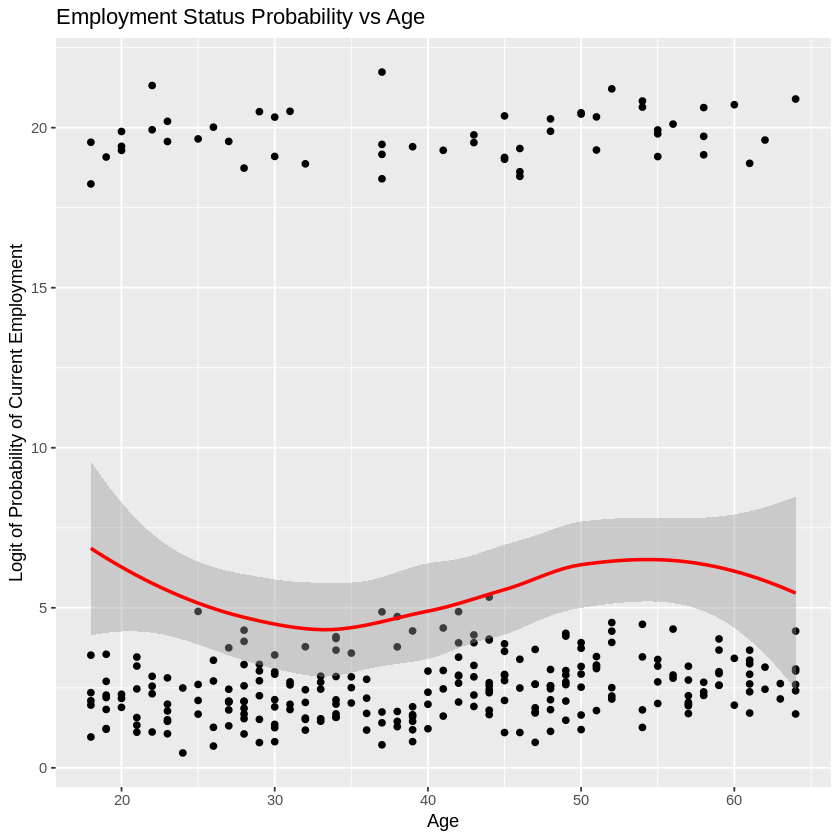

`geom_smooth()` using formula = 'y ~ x'


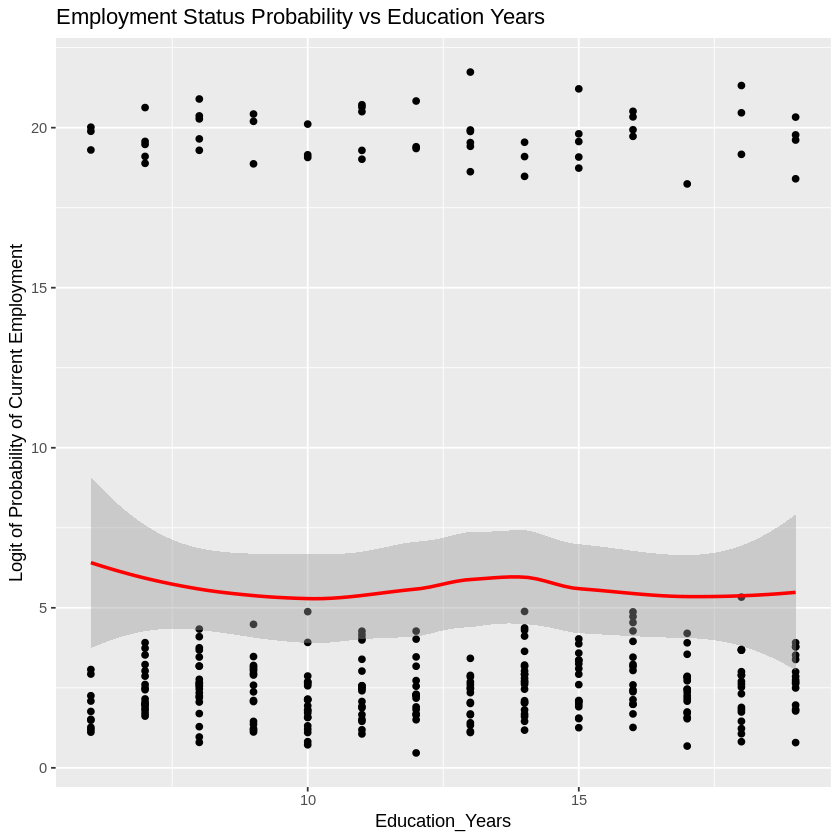

`geom_smooth()` using formula = 'y ~ x'


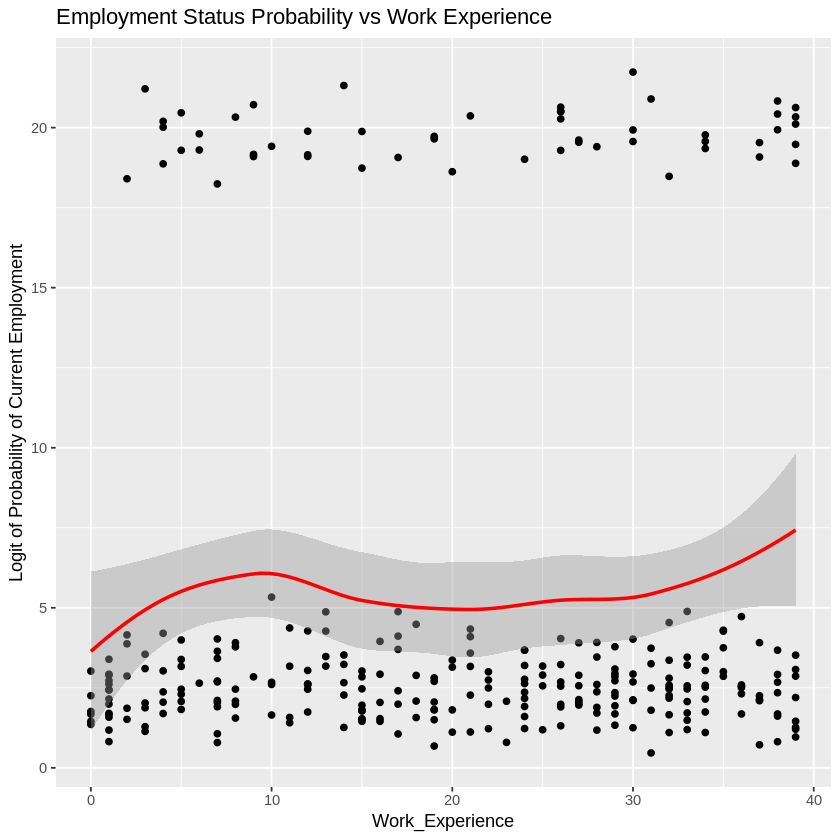

`geom_smooth()` using formula = 'y ~ x'


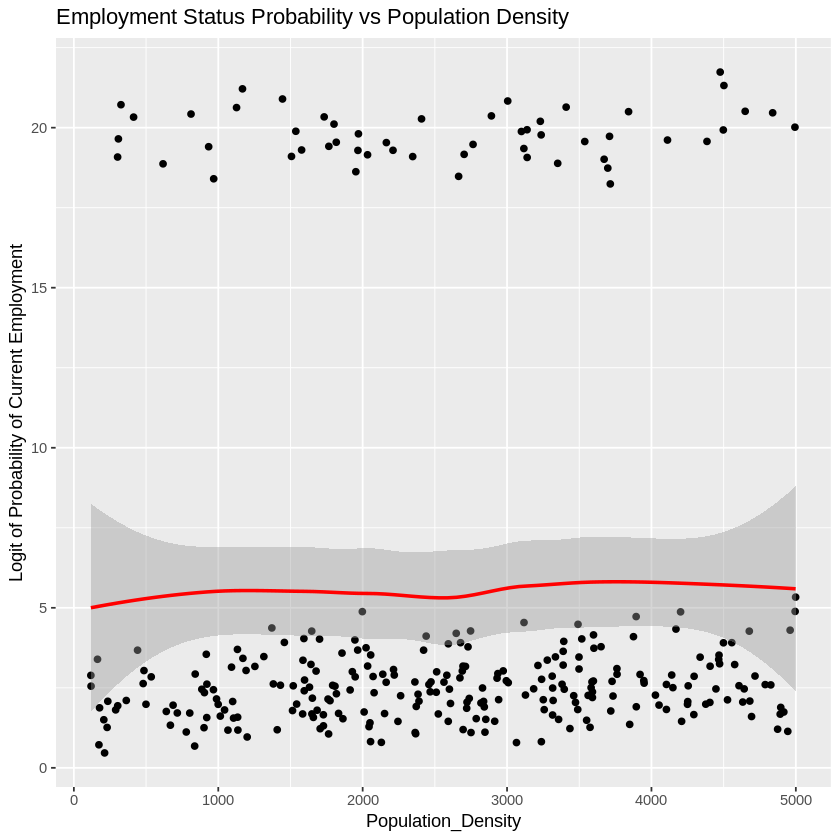

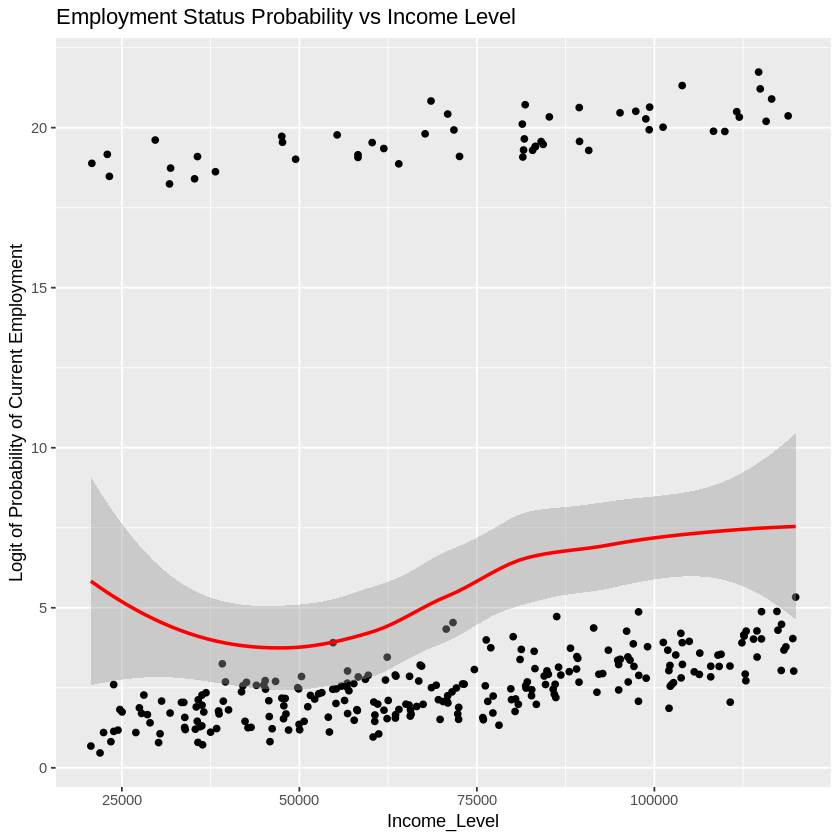

In [ ]:
# EDA
# linearity assumption plots with numeric variables, checking for quadratic terms
# result: tells us that Age, Work_Experience, and Income Level may require higher order
# terms, potentially cubics

# from this graph, we may need to add polynomial terms to Age
ggplot(data, aes(x = Age, y = logit)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Employment Status Probability vs Age", y = "Logit of Probability of Current Employment")

# from this graph, there are no large curves so no need for higher order terms
ggplot(data, aes(x = Education_Years, y = logit)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Employment Status Probability vs Education Years", y = "Logit of Probability of Current Employment")

# from this graph, we may need to add higher order terms
ggplot(data, aes(x = Work_Experience, y = logit)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Employment Status Probability vs Work Experience", y = "Logit of Probability of Current Employment")

# from this graph, there are no large curves so no need for higher order terms
ggplot(data, aes(x = Population_Density, y = logit)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Employment Status Probability vs Population Density", y = "Logit of Probability of Current Employment")

# from this graph, we may need to add higher order terms
ggplot(data, aes(x = Income_Level, y = logit)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Employment Status Probability vs Income Level", y = "Logit of Probability of Current Employment")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


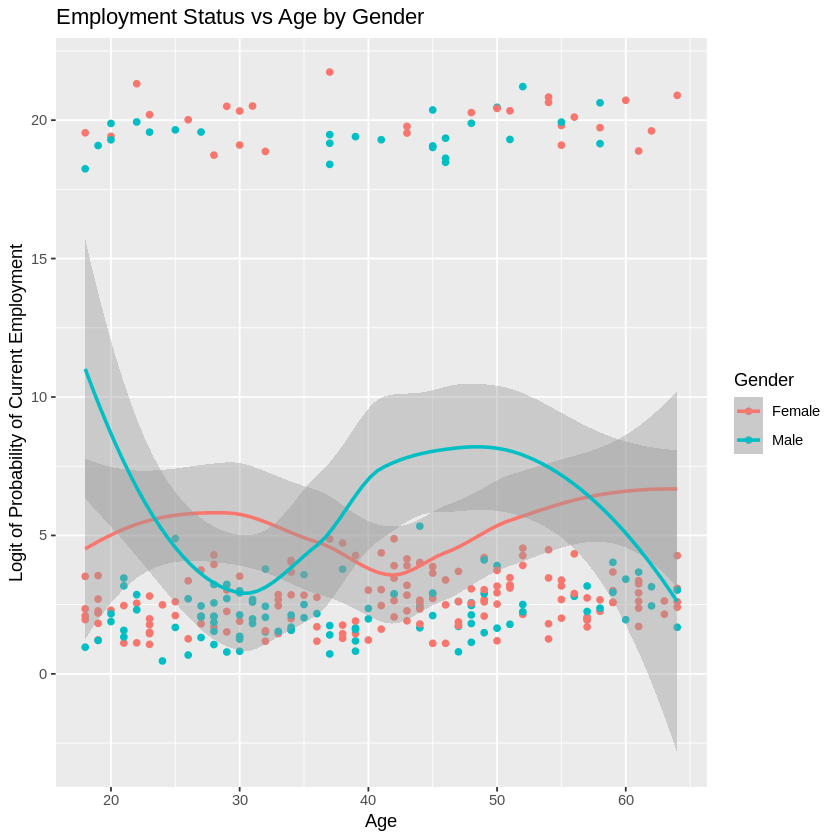

`geom_smooth()` using formula = 'y ~ x'


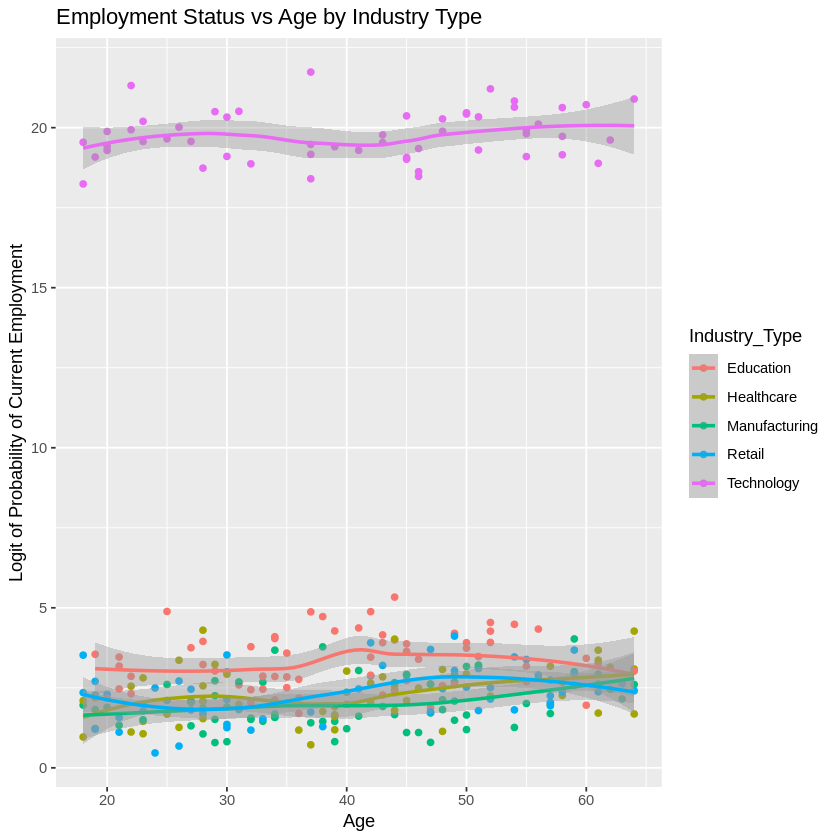

`geom_smooth()` using formula = 'y ~ x'


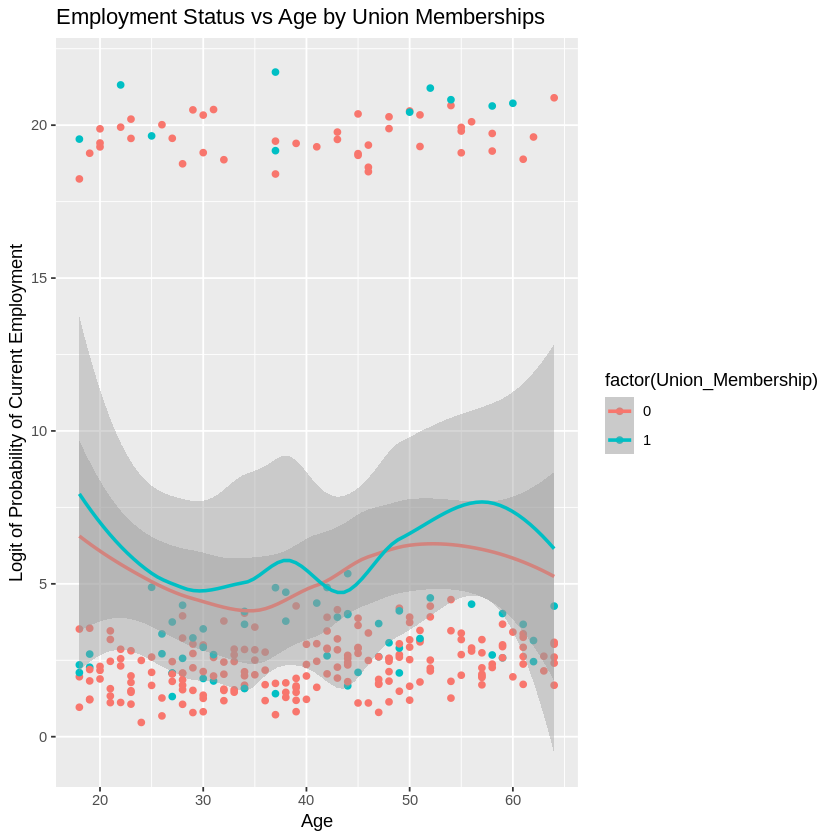

`geom_smooth()` using formula = 'y ~ x'


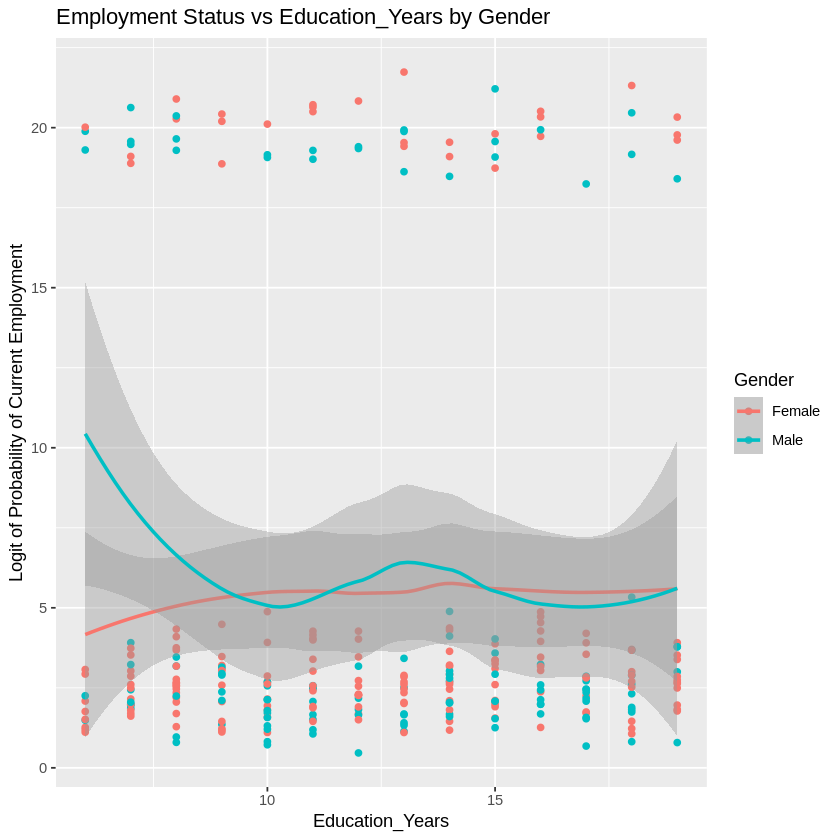

`geom_smooth()` using formula = 'y ~ x'


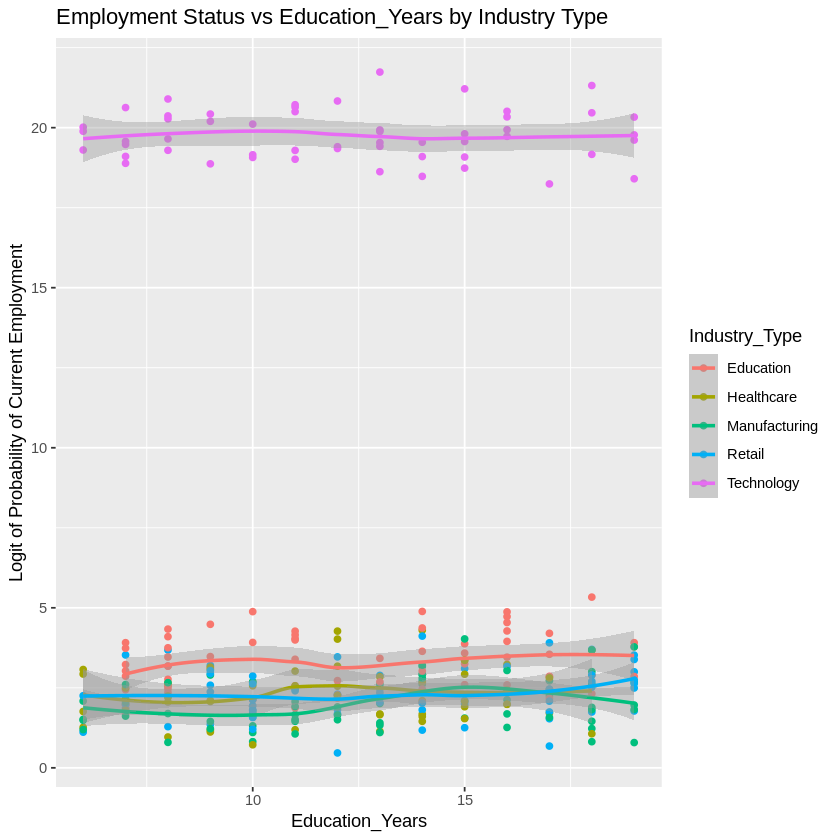

`geom_smooth()` using formula = 'y ~ x'


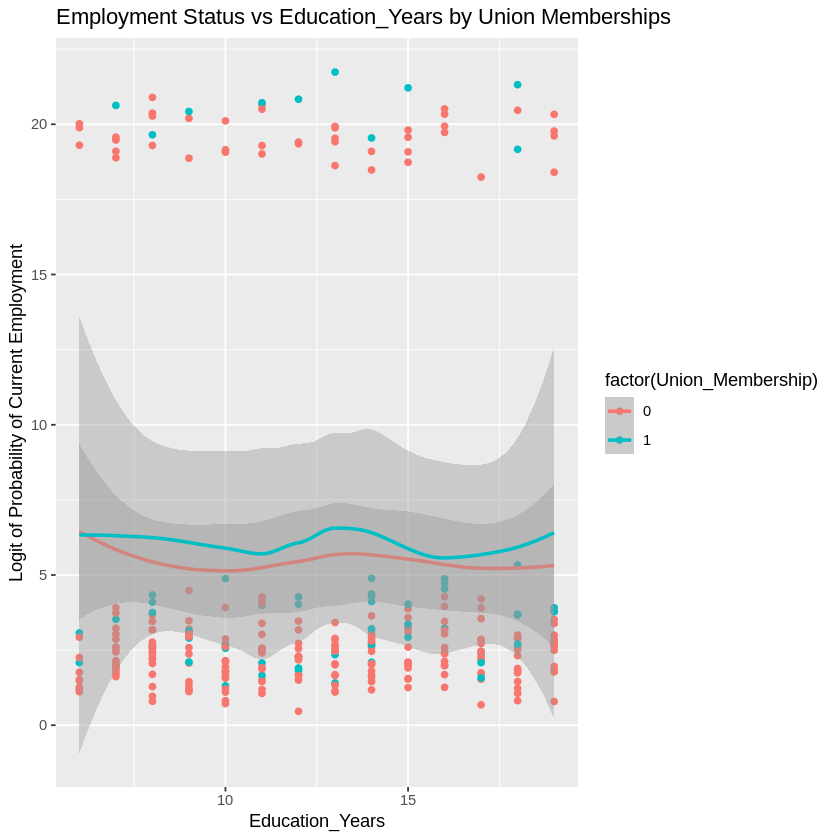

`geom_smooth()` using formula = 'y ~ x'


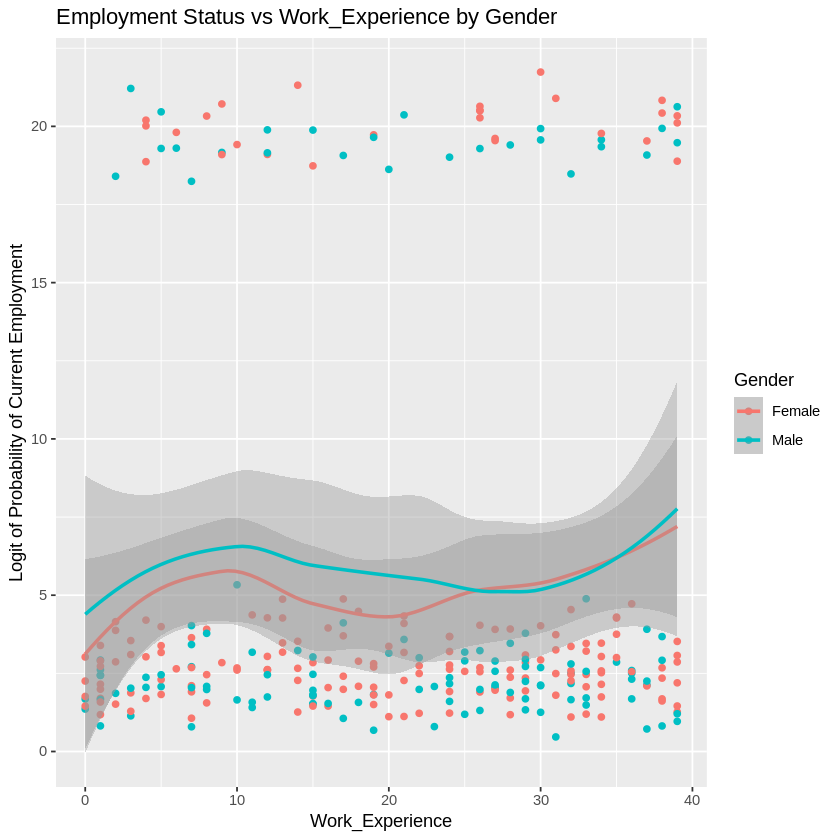

`geom_smooth()` using formula = 'y ~ x'


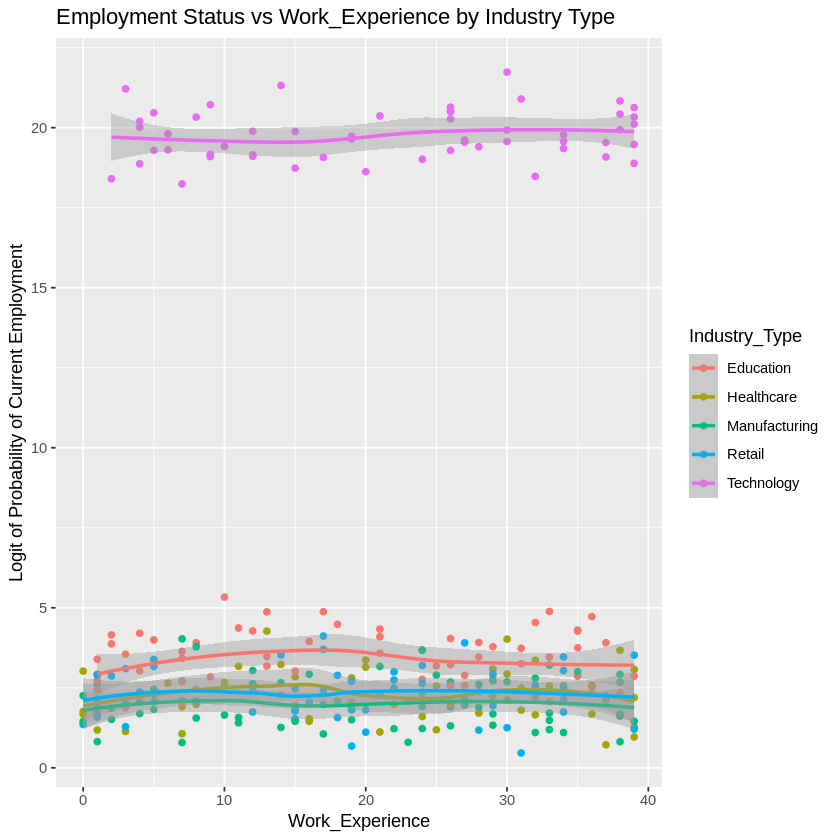

`geom_smooth()` using formula = 'y ~ x'


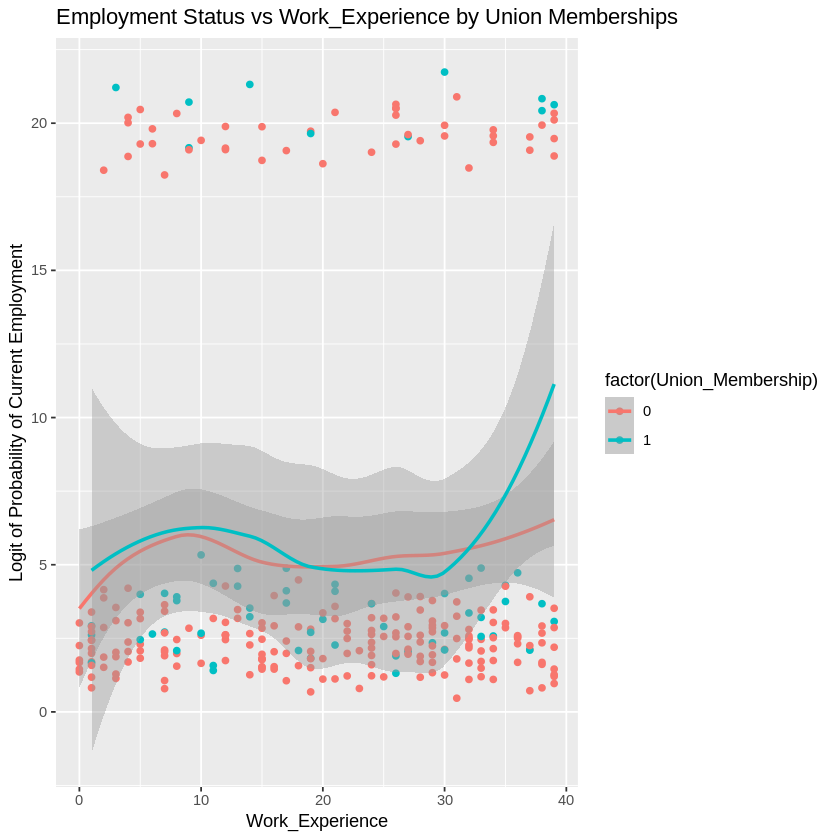

`geom_smooth()` using formula = 'y ~ x'


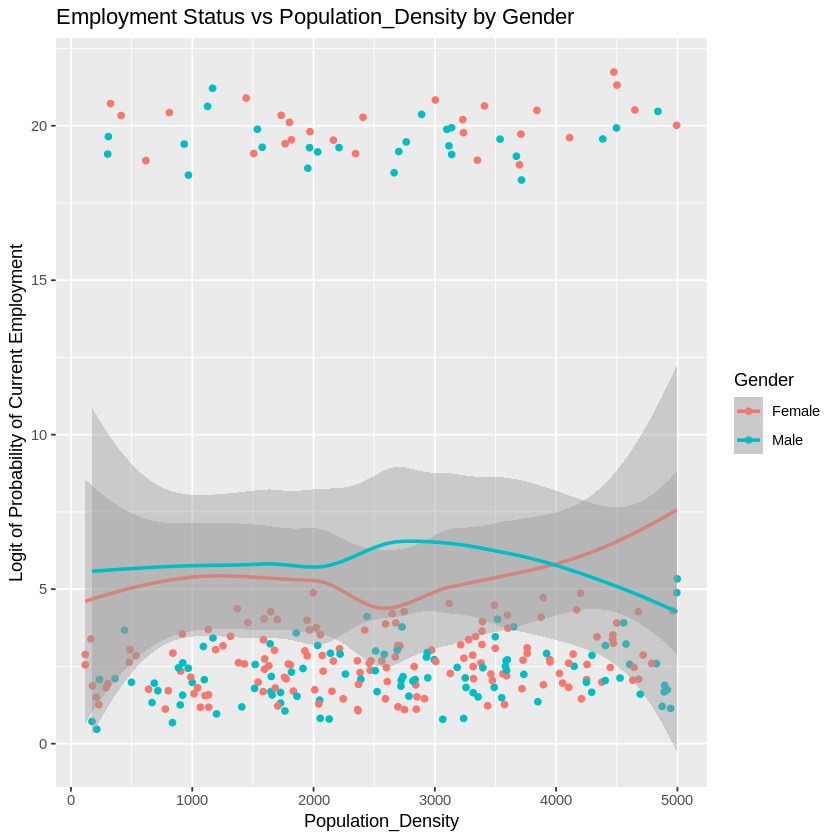

`geom_smooth()` using formula = 'y ~ x'


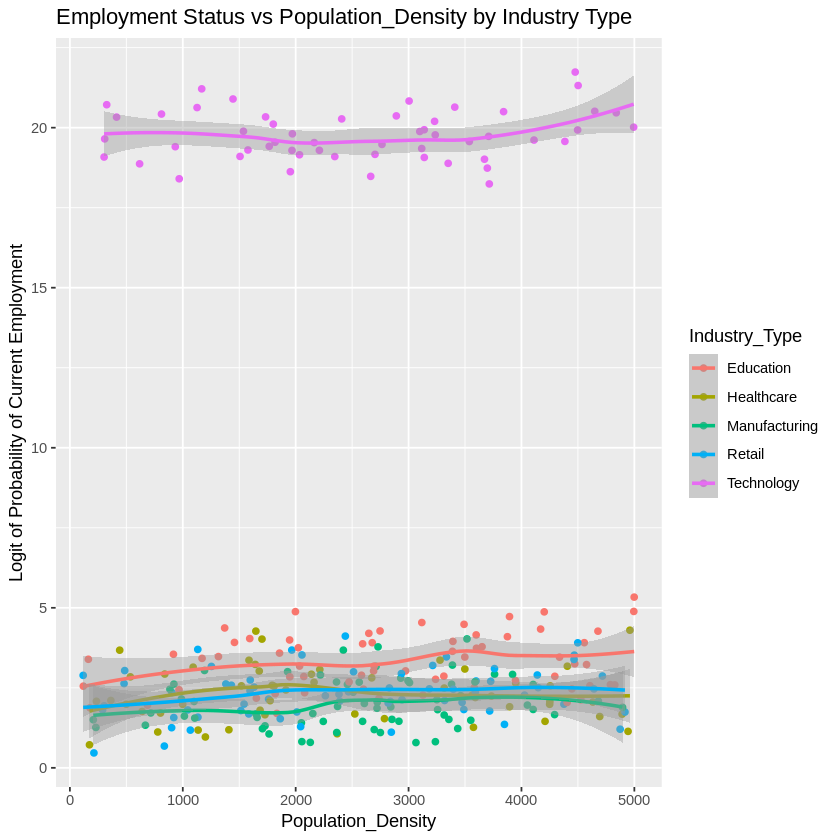

`geom_smooth()` using formula = 'y ~ x'


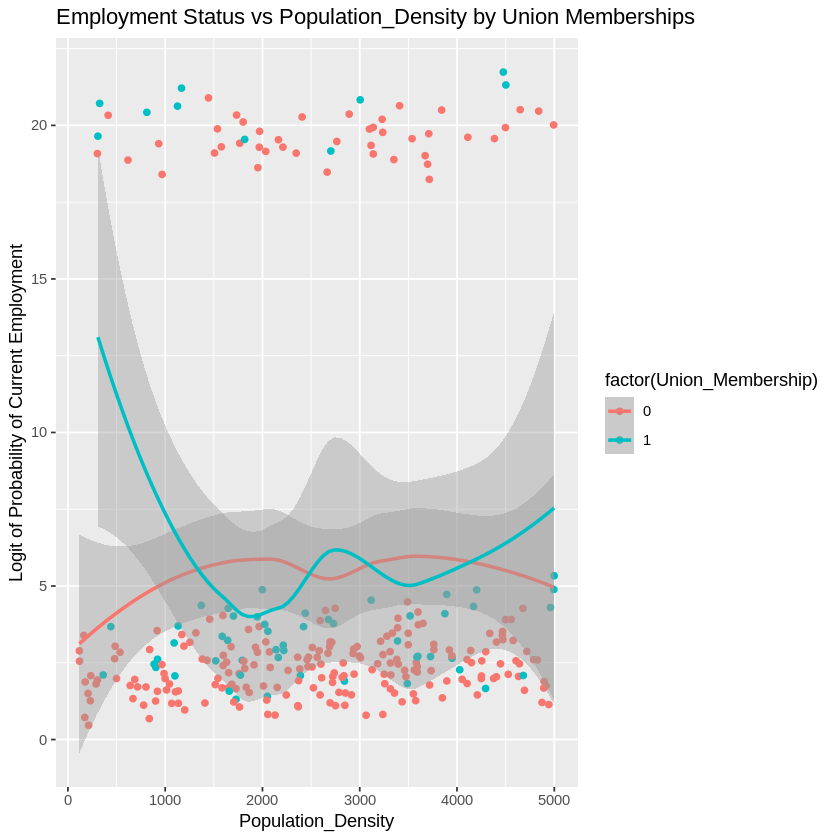

`geom_smooth()` using formula = 'y ~ x'


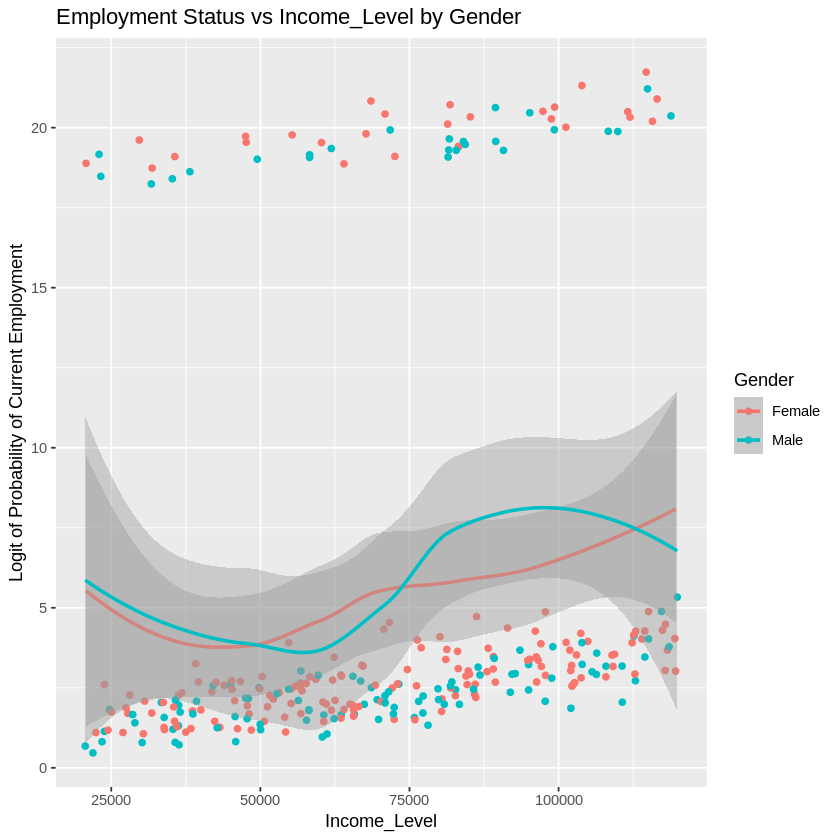

`geom_smooth()` using formula = 'y ~ x'


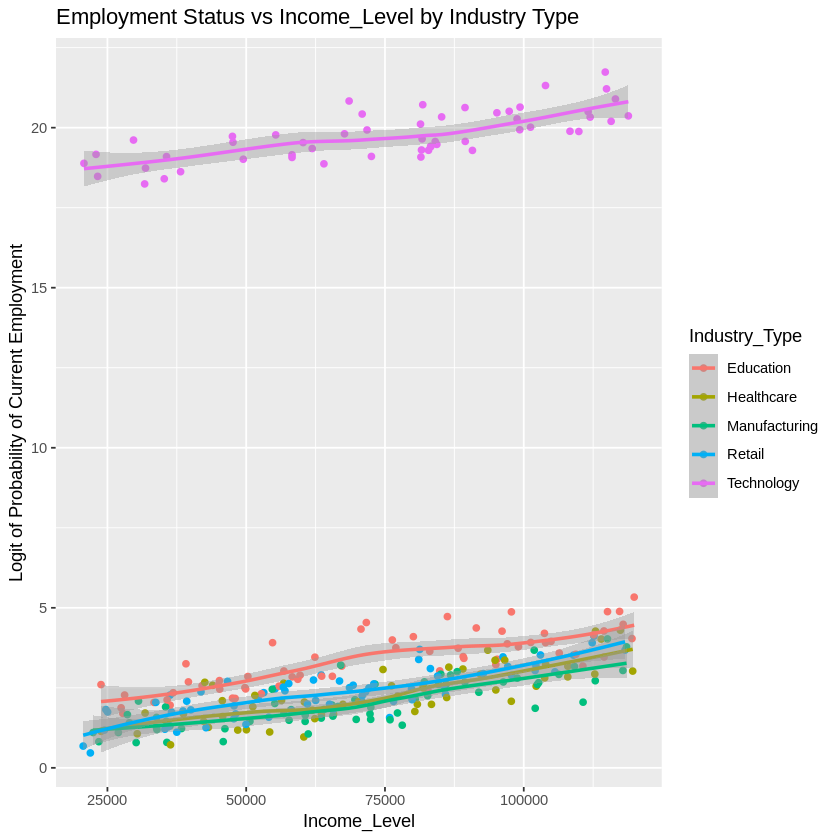

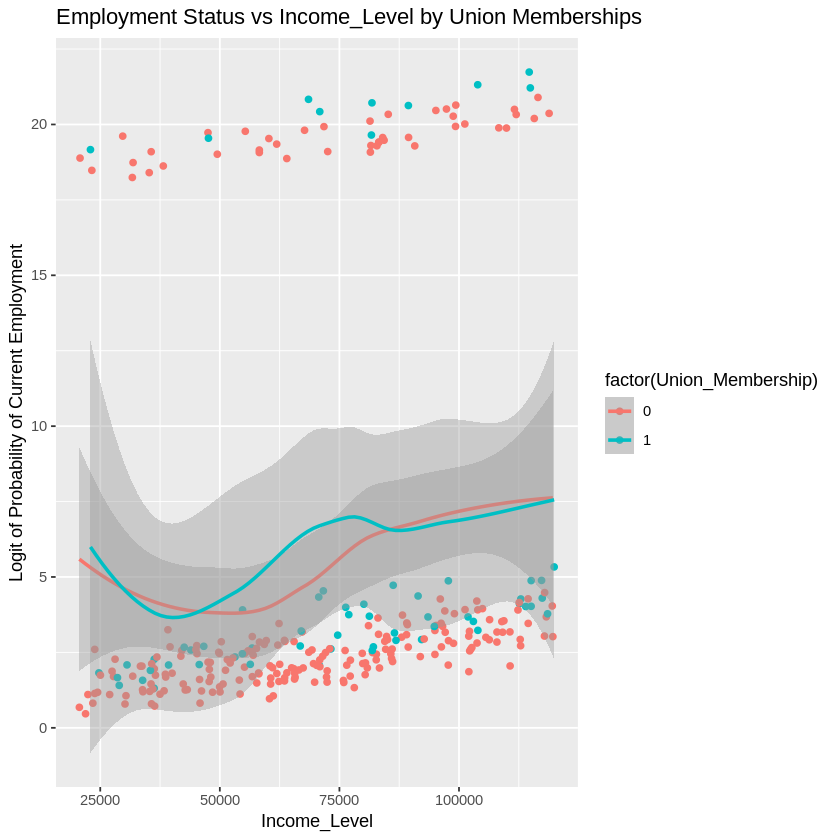

In [ ]:
# EDA
# linearity assumption plots for interactions, categorical variables with each numeric variable

# from this graph, there are major curves so Age and Gender could be an interaction term
ggplot(data, aes(x = Age, y = logit, color = Gender)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Age by Gender", y = "Logit of Probability of Current Employment")

# from this graph, there are slight curves so Age and Industry_Type could be an interaction term
ggplot(data, aes(x = Age, y = logit, color = Industry_Type)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Age by Industry Type", y = "Logit of Probability of Current Employment")

# from this graph, there are major curves so Age and Union_Membership could be an interaction term
ggplot(data, aes(x = Age, y = logit, color = factor(Union_Membership))) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Age by Union Memberships", y = "Logit of Probability of Current Employment")


# from this graph, there are some major curves so Education_Years and Gender could be an interaction term
ggplot(data, aes(x = Education_Years, y = logit, color = Gender)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Education_Years by Gender", y = "Logit of Probability of Current Employment")

# from this graph, the lines are mostly lineaar so we may not need an interaction term
ggplot(data, aes(x = Education_Years, y = logit, color = Industry_Type)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Education_Years by Industry Type", y = "Logit of Probability of Current Employment")

# from this graph, the are some curves so Education_Years and Union_Membership could be an interaction term
ggplot(data, aes(x = Education_Years, y = logit, color = factor(Union_Membership))) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Education_Years by Union Memberships", y = "Logit of Probability of Current Employment")



# from this graph, the are some curves so Work_Experience and Gender could be an interaction term
ggplot(data, aes(x = Work_Experience, y = logit, color = Gender)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Work_Experience by Gender", y = "Logit of Probability of Current Employment")

# from this graph, the lines are mostly linear so we may not need an interaction term
ggplot(data, aes(x = Work_Experience, y = logit, color = Industry_Type)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Work_Experience by Industry Type", y = "Logit of Probability of Current Employment")

# from this graph, the are some curves so Work_Experience and Union_Membership could be an interaction term
ggplot(data, aes(x = Work_Experience, y = logit, color = factor(Union_Membership))) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Work_Experience by Union Memberships", y = "Logit of Probability of Current Employment")



# from this graph, the are some curves so Population_Density and Gender might be an interaction term
ggplot(data, aes(x = Population_Density, y = logit, color = Gender)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Population_Density by Gender", y = "Logit of Probability of Current Employment")

# from this graph, the lines are mostly lineaar so we may not need an interaction term
ggplot(data, aes(x = Population_Density, y = logit, color = Industry_Type)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Population_Density by Industry Type", y = "Logit of Probability of Current Employment")

# from this graph, there are some major curves so Population_Density and Union_Membership could be an interaction term
ggplot(data, aes(x = Population_Density, y = logit, color = factor(Union_Membership))) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Population_Density by Union Memberships", y = "Logit of Probability of Current Employment")



# from this graph, the are some curves so Income_Level and Gender might be an interaction term
ggplot(data, aes(x = Income_Level, y = logit, color = Gender)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Income_Level by Gender", y = "Logit of Probability of Current Employment")

# from this graph, the lines are linear so we might not need an interaction term
ggplot(data, aes(x = Income_Level, y = logit, color = Industry_Type)) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Income_Level by Industry Type", y = "Logit of Probability of Current Employment")

# from this graph, the are some curves so Income_Level and Union_Membership could be an interaction term
ggplot(data, aes(x = Income_Level, y = logit, color = factor(Union_Membership))) +
  geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Employment Status vs Income_Level by Union Memberships", y = "Logit of Probability of Current Employment")

In [ ]:
#Multicollinearity
#No issues, all under 5
vif(main_model)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.052796,1,1.026058
Education_Years,1.065531,1,1.032246
Gender,1.035830,1,1.017758
Work_Experience,1.023927,1,1.011893
Industry_Type,1.077726,4,1.009401
Union_Membership,1.029216,1,1.014503
Population_Density,1.033113,1,1.016422
Income_Level,1.031528,1,1.015642


In [ ]:
#Full model
#Model with all main effects + notable higher order terms + notable interaction terms
#corresponding to the plots
full_model <- glm(formula = Currently_Employed ~ . + I(Age^2) + I(Age^3) + I(Work_Experience^2) + I(Work_Experience^3)
                  + I(Income_Level^2) + I(Income_Level^3) + Gender*Age + Industry_Type*Age + Gender*Education_Years
                  + Industry_Type*Education_Years + Industry_Type*Work_Experience + Industry_Type*Population_Density
                  + Population_Density*Union_Membership + Income_Level*Industry_Type, "binomial", data)
summary(full_model)


Call:
glm(formula = Currently_Employed ~ . + I(Age^2) + I(Age^3) + 
    I(Work_Experience^2) + I(Work_Experience^3) + I(Income_Level^2) + 
    I(Income_Level^3) + Gender * Age + Industry_Type * Age + 
    Gender * Education_Years + Industry_Type * Education_Years + 
    Industry_Type * Work_Experience + Industry_Type * Population_Density + 
    Population_Density * Union_Membership + Income_Level * Industry_Type, 
    family = "binomial", data = data)

Coefficients:
                                                Estimate Std. Error z value
(Intercept)                                   -2.406e+01  1.056e+01  -2.278
Age                                            1.741e+00  7.332e-01   2.374
Education_Years                                2.209e-01  2.371e-01   0.932
GenderMale                                     7.246e+00  2.874e+00   2.522
Work_Experience                                8.503e-02  2.159e-01   0.394
Industry_TypeHealthcare                        1.163e+00  5.488e+00   0.

In [ ]:
#Check linearity for all numeric variables in full model
#All seem pretty linear and hanging around 0, which we want
ggplot(data, aes(x = data$Age, y = resid(full_model))) + geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs. Age", x = "Age", y = "Residuals")

ggplot(data, aes(x = data$Education_Years, y = resid(full_model))) + geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs. Education Years", x = "Education Years", y = "Residuals")

ggplot(data, aes(x = data$Work_Experience, y = resid(full_model))) + geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs. Work Experience", x = "Work Experience", y = "Residuals")

ggplot(data, aes(x = data$Population_Density, y = resid(full_model))) + geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs. Population Density", x = "Population Density", y = "Residuals")

ggplot(data, aes(x = data$Income_Level, y = resid(full_model))) + geom_point() +
  geom_smooth(method = "loess") +
  labs(title = "Residuals vs. Income_Level", x = "Income_Level", y = "Residuals")

ERROR: Error in ggplot(data, aes(x = data$Age, y = resid(full_model))): could not find function "ggplot"


In [ ]:
#Global Wald Test for full model fails
wald.test(b = coef(full_model),
          Sigma = vcov(full_model),
          Terms = 2:length(coef(full_model)))

ERROR: Error in qr.solve(L %*% V %*% t(L)): singular matrix 'a' in solve


In [ ]:
#Upon further inspection, cutting down on higher order terms and interaction terms,
#the global wald test still fails for only the main effects since the resultant
#p-value is much higher than 0.05
wald.test(b = coef(main_model),
          Sigma = vcov(main_model),
          Terms = 2:length(coef(main_model)))

Wald test:
----------

Chi-squared test:
X2 = 11.9, df = 11, P(> X2) = 0.37

In [ ]:
#Next move is to start from scratch, build model up, starting with the only significant predictor
#in the main effects model
#Passes the global wald test
model_1 <- glm(formula = Currently_Employed ~ Income_Level, "binomial", data)
summary(model_1)

wald.test(b = coef(model_1),
          Sigma = vcov(model_1),
          Terms = 2:length(coef(model_1)))


Call:
glm(formula = Currently_Employed ~ Income_Level, family = "binomial", 
    data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  9.122e-01  5.335e-01   1.710  0.08731 . 
Income_Level 2.316e-05  8.490e-06   2.728  0.00636 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 172.10  on 299  degrees of freedom
Residual deviance: 163.89  on 298  degrees of freedom
AIC: 167.89

Number of Fisher Scoring iterations: 5


Wald test:
----------

Chi-squared test:
X2 = 7.4, df = 1, P(> X2) = 0.0064

In [ ]:
#Attempting to add predictors of interest, we add Work_Experience
#Model passes global wald test, however, Work_Experience is not significant
model_2 <- glm(formula = Currently_Employed ~ Income_Level + Work_Experience, "binomial", data)
summary(model_2)

wald.test(b = coef(model_2),
          Sigma = vcov(model_2),
          Terms = 2:length(coef(model_2)))


Call:
glm(formula = Currently_Employed ~ Income_Level + Work_Experience, 
    family = "binomial", data = data)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)     8.445e-01  6.461e-01   1.307  0.19117   
Income_Level    2.320e-05  8.488e-06   2.733  0.00628 **
Work_Experience 3.231e-03  1.752e-02   0.184  0.85370   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 172.10  on 299  degrees of freedom
Residual deviance: 163.86  on 297  degrees of freedom
AIC: 169.86

Number of Fisher Scoring iterations: 5


Wald test:
----------

Chi-squared test:
X2 = 7.5, df = 2, P(> X2) = 0.024

In [ ]:
#Despite not being significant, we attempt the Likelihood Ratio Test to see if
#we should keep the full of reduced model
mod2.loglik = logLik(model_2)
Reduced.loglik = logLik(model_1)

mod2.loglik
Reduced.loglik

teststat <- -2*(as.numeric(Reduced.loglik) - as.numeric(mod2.loglik))

p.val <- pchisq(teststat, df = 1, lower.tail = FALSE) #p-val = 0.8538, implies go with reduced model

p.val

#Conclude we should keep model with only the Income_Level

'log Lik.' -81.93038 (df=3)

'log Lik.' -81.94737 (df=2)

[1] 0.8537696